<a href="https://colab.research.google.com/github/Marcysp/PCVK_Ganjil_2023/blob/main/week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 2. Akses folder images pada Google Drive

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Transformasi Linier Brightness


Mengubah tingkat kecerahan citra 
---------------------------------
Masukkan nilai kecerahan: 50


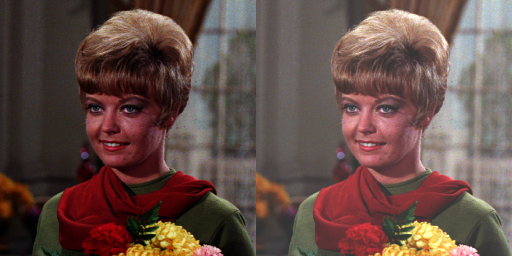

In [19]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah tingkat kecerahan citra ')
print('---------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_sem5/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(original[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## TUGAS PRAKTIKUM

### 1.  Implementasikan inverse citra pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori, sehingga menghasilkan keluaran seperti berikut:

Mengimplementasikan inverse citra 
--------------------------------- 


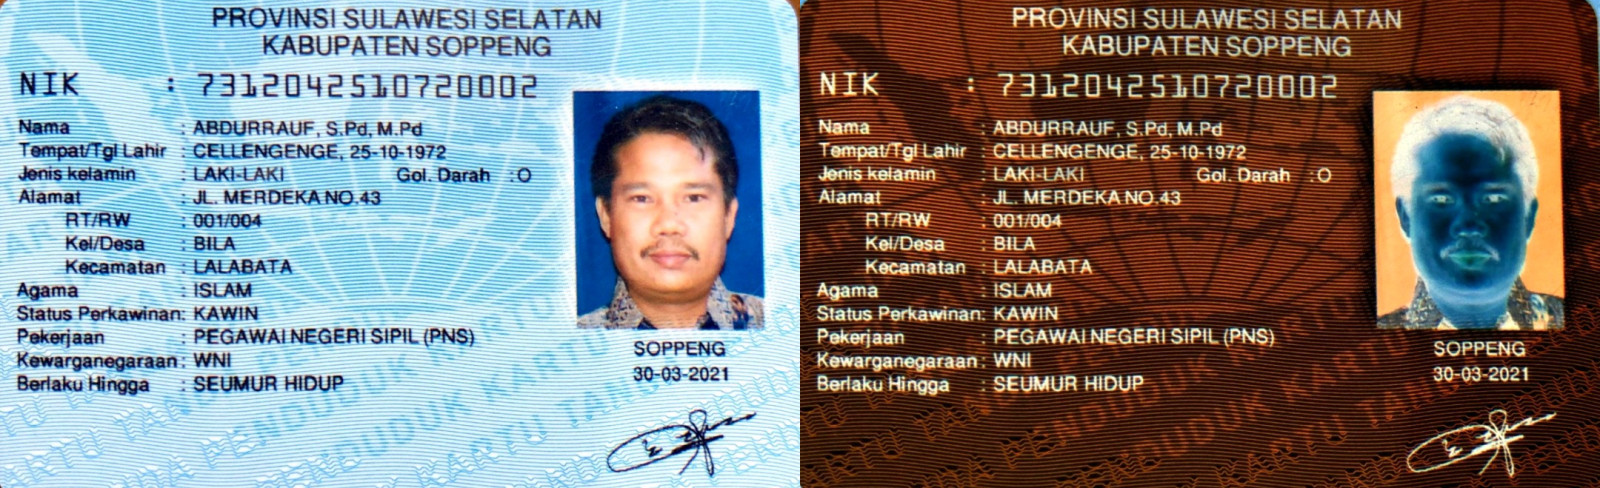

In [20]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengimplementasikan inverse citra ')
print('--------------------------------- ')

original1 = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
inverse_image = np.zeros(original1.shape, original1.dtype)

#akses per piksel
for y in range(original1.shape[0]):
  for x in range(original1.shape[1]):
    for c in range(original1.shape[2]):
      # np.clip(..., 0, 255) -> digunakan untuk memastikan nilai piksel
      # tetap berada pada rentanbg valid untuk gambar 8-bit
      inverse_image[y,x,c] = np.clip( 255 - original1[y,x,c], 0, 255)


final_frame = cv.hconcat((original1, inverse_image))
cv2_imshow(final_frame)

### 2. Implementasikan transformasi contrast pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk kontras

Mengubah kontras dan tingkat kecerahan citra 
---------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 2


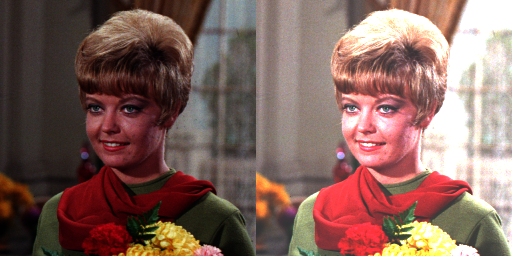

In [21]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah kontras dan tingkat kecerahan citra ')
print('---------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

try:
  contras = float(input('Masukkan kontras [1.0 - 3.0]: '))
except ValueError:
  print('Error, not a valid number')

original2 = cv.imread('/content/drive/MyDrive/PCVK_sem5/female.tiff')
contrass_image = np.zeros(original2.shape, original2.dtype)

# akses per piksel
# for y in range(original2.shape[0]):
#   for x in range(original2.shape[1]):
#     for c in range(original2.shape[2]):
#       contrass_image[y,x,c] = np.clip(contras * original2[y,x,c] + brightness, 0, 255)

# cara simple tanpa for loop
contrass_image = cv.convertScaleAbs(original2, alpha = contras, beta=brightness)

final_frame = cv.hconcat((original2, contrass_image))
cv2_imshow(final_frame)

### 3. Implementasikan transformasi logarithmic brightness pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori untuk transformasi log

Mengubah tingkat kecerahan citra dengan Transformasi Log 
---------------------------------------------------------
Masukkan nilai kecerahan [-255 - 255]: 50


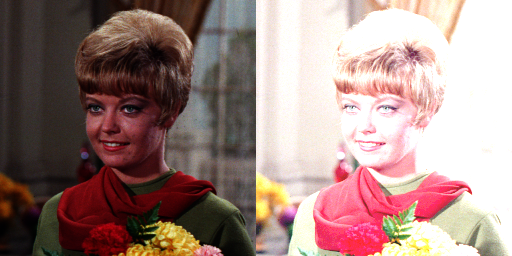

In [22]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

print('Mengubah tingkat kecerahan citra dengan Transformasi Log ')
print('---------------------------------------------------------')
try:
  brightness = int(input('Masukkan nilai kecerahan [-255 - 255]: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PCVK_sem5/female.tiff')
brightness_log_image = np.zeros(original.shape, original.dtype)

# menemukan nilai c
scaling_factor = 255/(np.log(1+brightness))

# akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_log_image[y,x,c] = np.clip(scaling_factor * (np.log(1+original[y,x,c])), 0, 255)

final_frame = cv.hconcat((original, brightness_log_image))
cv2_imshow(final_frame)



### 4. Implementasikan transformasi grayscale menggunakan metode averaging, lightness, dan luminance pada Google Colaboratory menggunakan formula yang terdapat pada bagian Ulasan Teori

a. Averaging (menggunakan library)

Transformasi Grayscale metode Averaging 
----------------------------------------


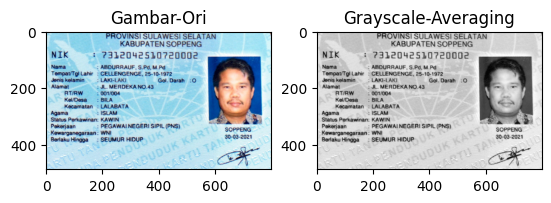

In [42]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print('Transformasi Grayscale metode Averaging ')
print('----------------------------------------')

image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)

# Hitung rata-rata dari tiga saluran warna
averaging_image = np.mean(image, axis=2).astype(np.uint8)


# show
plt.subplot(1,2,1)
plt.title('Gambar-Ori')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('Grayscale-Averaging')
plt.imshow(averaging_image, cmap='gray')
# final_frame = cv.hconcat((original1, averaging_image))
plt.show()

a. averaging (percobaan menggunakan manual)

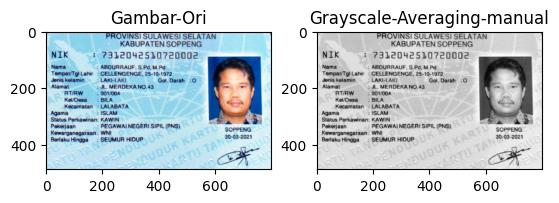

In [85]:
# import library
import cv2 as cv
from google.colab.patches import cv2_imshow
import numpy as np

original1 = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
original1_rgb = cv.cvtColor(original1,cv.COLOR_BGR2RGB)

# buat placeholder
# gray_image = np.zeros(original1_rgb.shape, original1_rgb.dtype)
gray_image = np.copy(original1_rgb)

# akses per piksel
for y in range(original1_rgb.shape[0]):
  for x in range(original1_rgb.shape[1]):
    for c in range(original1_rgb.shape[2]):
      avg = ((int(original1_rgb[y,x,0]) + int(original1_rgb[y,x,1]) + int(original1_rgb[y,x,2]))/3)
      gray_image[y,x,c] = avg


# show
plt.subplot(1,2,1)
plt.title('Gambar-Ori')
plt.imshow(original1_rgb)

plt.subplot(1,2,2)
plt.title('Grayscale-Averaging-manual')
plt.imshow(gray_image)

plt.show()

b. Lightness

Transformasi Grayscale metode Lightness 
----------------------------------------


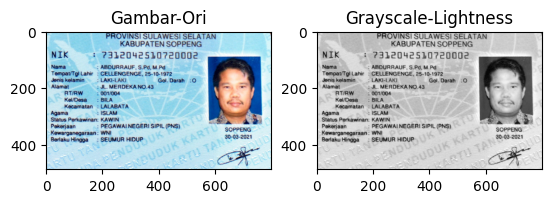

In [83]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print('Transformasi Grayscale metode Lightness ')
print('----------------------------------------')

image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)

# Lightness

lightness_image = (np.max(image_rgb, axis=2))/2 + (np.min(image_rgb, axis=2)) / 2
# lightness_image = np.average(np.stack([image_rgb.max(axis=2), image_rgb.min(axis=2)], axis=2), axis=2, weights=[0.5, 0.5]).astype(np.uint8)


# show
plt.subplot(1,2,1)
plt.title('Gambar-Ori')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('Grayscale-Lightness')
plt.imshow(lightness_image, cmap='gray')
# final_frame = cv.hconcat((original1, averaging_image))
plt.show()

c.Luminance

Transformasi Grayscale metode Lightness 
----------------------------------------


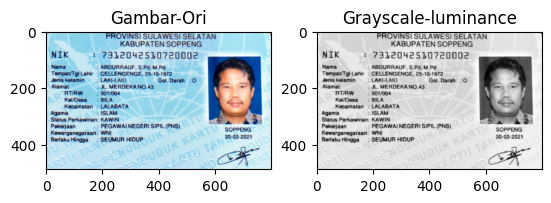

In [57]:
import cv2 as cv
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np

print('Transformasi Grayscale metode Lightness ')
print('----------------------------------------')

image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image,cv.COLOR_BGR2RGB)

# luminance
luminance_image = (0.21 * original1[:,:,0] + 0.7152 * original1[:,:,1] + 0.0722 * original1[:,:,2]).astype(np.uint8)


# show
plt.subplot(1,2,1)
plt.title('Gambar-Ori')
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.title('Grayscale-luminance')
plt.imshow(luminance_image, cmap='gray')
# final_frame = cv.hconcat((original1, averaging_image))
plt.show()

### 5.  Tampilkanlah warna tertentu pada citra, dan ubah warna lain menjadi grayscale. Misal, tampilkan warna biru pada citra masukan dan ubah bagian lain yang tidak berwarna biru menjadi grayscale seperti pada contoh berikut:


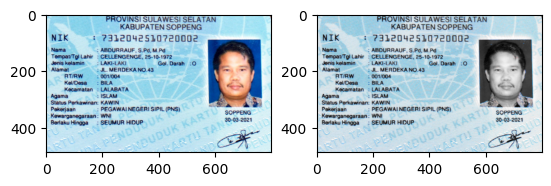

In [91]:
# mengubah citra menjadi grayscale kecuali yang berwarna biru

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert image to grayscale
gray_image = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

# membuat range untuk warna biru
lower_blue = np.array([21, 67, 145])
upper_blue = np.array([200, 233, 250])

# Create a mask for blue color
blue_mask = cv.inRange(image_rgb, lower_blue, upper_blue)

# Convert gray image to a 3 channel grayscale image
gray_image_3channel = cv.cvtColor(gray_image, cv.COLOR_GRAY2RGB)

# Use numpy array indexing to combine both images
result_image = np.where(blue_mask[:,:,None].astype(bool), image_rgb, gray_image_3channel)

plt.subplot(1,2,1)
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.imshow(result_image)
# plt.axis('off')
plt.show()

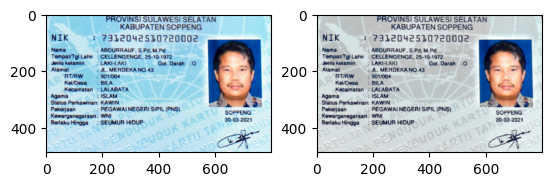

In [102]:
# menggunakan upper dan lower
# mengubah citra menjadi grayscale untuk yang berwarna biru

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Convert image to grayscale
gray_image = cv.cvtColor(image_rgb, cv.COLOR_RGB2GRAY)

# membuat range untuk warna biru
lower_blue = np.array([20, 65, 140])
upper_blue = np.array([222, 244, 255])

# Create a mask for blue color
blue_mask = cv.inRange(image_rgb, lower_blue, upper_blue)

# Convert gray image to a 3 channel grayscale image
gray_image_3channel = cv.cvtColor(gray_image, cv.COLOR_GRAY2RGB)

# Use numpy array indexing to combine both images
# Inverse the logic, where blue_mask is, put grayscale, where it isn't, put original RGB
result_image = np.where(blue_mask[:,:,None].astype(bool), gray_image_3channel, image_rgb)

plt.subplot(1,2,1)
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.imshow(result_image)
# plt.axis('off')
plt.show()


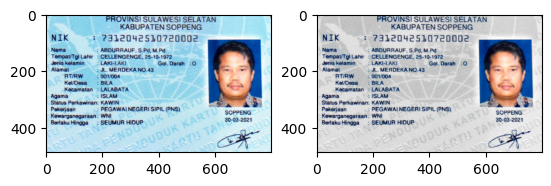

In [107]:
from ast import Yield
# menggunakan upper dan lower
# mengubah citra menjadi grayscale untuk yang berwarna biru

import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

# Load image
image = cv.imread('/content/drive/MyDrive/PCVK_sem5/KTP.jpeg')
image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)
gray_image = np.zeros(image_rgb.shape, image_rgb.dtype)

# akses per piksel
for y in range(original1_rgb.shape[0]):
  for x in range(original1_rgb.shape[1]):
    R = int(image_rgb[y,x,0])
    G = int(image_rgb[y,x,1])
    B = int(image_rgb[y,x,2])

    avg = (R+G+B)/3
    if(R<252 and G>0 and B>200):
      gray_image[y,x] = avg
    else:
      gray_image[y,x] = image_rgb[y,x]

plt.subplot(1,2,1)
plt.imshow(image_rgb)

plt.subplot(1,2,2)
plt.imshow(gray_image)
# plt.axis('off')
plt.show()
